# Import Dependenies

In [1]:
import pandas as pd
import os

# Load Feature Extraction and and Linguistic Transformation

In [2]:
print("Searching for your uploaded files...")

# This is the standard directory where Kaggle datasets are mounted
input_dir = '/kaggle/input/highdv1'
found_csvs = []

if os.path.exists(input_dir):
    # Walk through all directories and files in /kaggle/input/
    for dirname, _, filenames in os.walk(input_dir):
        for filename in filenames:
            if filename.endswith('.csv'):
                full_path = os.path.join(dirname, filename)
                found_csvs.append(full_path)
                print(f"Found: {full_path}")
else:
    print(f"Error: The directory {input_dir} does not exist.")
    print("Please make sure your dataset is correctly added to this notebook.")

if not found_csvs:
    print("\nNo CSV files found in /kaggle/input/.")

Searching for your uploaded files...
Found: /kaggle/input/highdv1/linguistic_kg_dataset.csv
Found: /kaggle/input/highdv1/numerical_dl_dataset.csv


In [3]:
# --- ACTION REQUIRED ---
# Copy the paths from the output of Cell 2 and paste them here.

path_feature = '/kaggle/input/highdv1/numerical_dl_dataset.csv'
path_linguistic = '/kaggle/input/highdv1/linguistic_kg_dataset.csv'

print(f"Path set for Feature file: {path_feature}")
print(f"Path set for Linguistic file: {path_linguistic}")

Path set for Feature file: /kaggle/input/highdv1/numerical_dl_dataset.csv
Path set for Linguistic file: /kaggle/input/highdv1/linguistic_kg_dataset.csv


In [4]:
try:
    df_feature = pd.read_csv(path_feature)
    print("--- Head of Feature Extraction File ---")
    print(df_feature.head())
except FileNotFoundError:
    print(f"Error: File not found at '{path_feature}'")
    print("Please go back to Cell 3 and double-check the path.")
except Exception as e:
    print(f"An error occurred while loading {path_feature}: {e}")

--- Head of Feature Extraction File ---
   id  frame  yVelocity  yAcceleration     intention  ttc  ttc_leftPreceding  \
0   1      1       0.00            0.0  Lane Keeping  0.0              100.0   
1   1      2       0.00            0.0  Lane Keeping  0.0              100.0   
2   1      3       0.00            0.0  Lane Keeping  0.0              100.0   
3   1      4       0.00            0.0  Lane Keeping  0.0              100.0   
4   1      5       0.01            0.0  Lane Keeping  0.0              100.0   

   ttc_leftFollowing  ttc_rightPreceding  ttc_rightFollowing  recordingId  
0              100.0               100.0               100.0            1  
1              100.0               100.0               100.0            1  
2              100.0               100.0               100.0            1  
3              100.0               100.0               100.0            1  
4              100.0               100.0               100.0            1  


In [6]:
try:
    df_linguistic = pd.read_csv(path_linguistic)
    print("\n--- Head of Linguistic Transformation File ---")
    print(df_linguistic.head())
except FileNotFoundError:
    print(f"Error: File not found at '{path_linguistic}'")
    print("Please go back to Cell 3 and double-check the path.")
except Exception as e:
    print(f"An error occurred while loading {path_linguistic}: {e}")


--- Head of Linguistic Transformation File ---
   id  frame latVelocity_ling     latAcceleration_ling ttc_ling  \
0   1      1   movingStraight  zeroLateralAcceleration      NaN   
1   1      2   movingStraight  zeroLateralAcceleration      NaN   
2   1      3   movingStraight  zeroLateralAcceleration      NaN   
3   1      4   movingStraight  zeroLateralAcceleration      NaN   
4   1      5   movingStraight  zeroLateralAcceleration      NaN   

  ttc_leftPreceding_ling ttc_leftFollowing_ling ttc_rightPreceding_ling  \
0                   safe                   safe                    safe   
1                   safe                   safe                    safe   
2                   safe                   safe                    safe   
3                   safe                   safe                    safe   
4                   safe                   safe                    safe   

  ttc_rightFollowing_ling    intention_ling  recordingId  
0                    safe  isMovingStra

In [7]:
df_feature.head()

,id,frame,yVelocity,yAcceleration,intention,ttc,ttc_leftPreceding,ttc_leftFollowing,ttc_rightPreceding,ttc_rightFollowing,recordingId
0,1,1,0.00,0.0,Lane Keeping,0.0,100.0,100.0,100.0,100.0,1
1,1,2,0.00,0.0,Lane Keeping,0.0,100.0,100.0,100.0,100.0,1
2,1,3,0.00,0.0,Lane Keeping,0.0,100.0,100.0,100.0,100.0,1
3,1,4,0.00,0.0,Lane Keeping,0.0,100.0,100.0,100.0,100.0,1
4,1,5,0.01,0.0,Lane Keeping,0.0,100.0,100.0,100.0,100.0,1


In [8]:
df_linguistic.head()

,id,frame,latVelocity_ling,latAcceleration_ling,ttc_ling,ttc_leftPreceding_ling,ttc_leftFollowing_ling,ttc_rightPreceding_ling,ttc_rightFollowing_ling,intention_ling,recordingId
0,1,1,movingStraight,zeroLateralAcceleration,NaN,safe,safe,safe,safe,isMovingStraight,1
1,1,2,movingStraight,zeroLateralAcceleration,NaN,safe,safe,safe,safe,isMovingStraight,1
2,1,3,movingStraight,zeroLateralAcceleration,NaN,safe,safe,safe,safe,isMovingStraight,1
3,1,4,movingStraight,zeroLateralAcceleration,NaN,safe,safe,safe,safe,isMovingStraight,1
4,1,5,movingStraight,zeroLateralAcceleration,NaN,safe,safe,safe,safe,isMovingStraight,1


# Knowledge Graph Creation

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch # For custom legend

In [10]:
# --- This cell is for you ---
# Make sure you have already run your code to load your CSV
# into the 'df_linguistic' variable.

if 'df_linguistic' in locals():
    print("Found 'df_linguistic' variable.")
    print("Data head:")
    print(df_linguistic.head())
else:
    print("ERROR: 'df_linguistic' variable not found.")
    print("Please load your 'linguistic transformation.csv' into a variable named 'df_linguistic' before proceeding.")

Found 'df_linguistic' variable.
Data head:
   id  frame latVelocity_ling     latAcceleration_ling ttc_ling  \
0   1      1   movingStraight  zeroLateralAcceleration      NaN   
1   1      2   movingStraight  zeroLateralAcceleration      NaN   
2   1      3   movingStraight  zeroLateralAcceleration      NaN   
3   1      4   movingStraight  zeroLateralAcceleration      NaN   
4   1      5   movingStraight  zeroLateralAcceleration      NaN   

  ttc_leftPreceding_ling ttc_leftFollowing_ling ttc_rightPreceding_ling  \
0                   safe                   safe                    safe   
1                   safe                   safe                    safe   
2                   safe                   safe                    safe   
3                   safe                   safe                    safe   
4                   safe                   safe                    safe   

  ttc_rightFollowing_ling    intention_ling  recordingId  
0                    safe  isMovingStraight 

# Define Ontology relations, Node types, and Linguistic value-to-color mappings

In [12]:
# --- 1. Configuration: Set your Vehicle ID Column ---
# From your file's column list: ['id', 'frame', 'latVelocity_ling', ...]
VEHICLE_ID_COLUMN_NAME = "id"
print(f"Using '{VEHICLE_ID_COLUMN_NAME}' as the Vehicle ID column.")


# --- 2. Ontology: Define Relations ---
# Maps your DataFrame columns to the KG relation names
ONTOLOGY_RELATIONS = {
    'intention_ling': 'INTENTION_IS',
    'latVelocity_ling': 'LATERAL_VELOCITY_IS',
    'latAcceleration_ling': 'LATERAL_ACCELERATION_IS',
    'ttc_ling': 'TTC_WITH_PRECEDING_VEHICLE_IS',
    'ttc_leftPreceding_ling': 'TTC_WITH_LEFT_PRECEDING_VEHICLE_IS',
    'ttc_rightPreceding_ling': 'TTC_WITH_RIGHT_PRECEDING_VEHICLE_IS',
    'ttc_leftFollowing_ling': 'TTC_WITH_LEFT_FOLLOWING_VEHICLE_IS',
    'ttc_rightFollowing_ling': 'TTC_WITH_RIGHT_FOLLOWING_VEHICLE_IS',
}
print("Ontology relations defined.")

# --- 3. Ontology: Define Node Types & Colors (for Legend) ---
NODE_TYPES = {
    'targetVehicle': 'orange',
    'Vehicle ID': 'tan',
    'Lane Change Prediction': 'lightgreen',
    'Target Vehicle Features': 'lightblue',
    'TTC to Surrounding Vehicles': 'lightcoral',
}
print("Node types for visualization defined.")

# --- 4. Ontology: Map Linguistic Values to Node Types ---
# This tells the visualizer which *value* gets which color
FEATURE_TO_NODE_TYPE_MAPPING = {
    # Intention instances
    'LK': 'Lane Change Prediction',
    'RLC': 'Lane Change Prediction',
    'LLC': 'Lane Change Prediction',
    
    # Lateral Velocity instances
    'movingLeft': 'Target Vehicle Features',
    'movingStraight': 'Target Vehicle Features',
    'movingRight': 'Target Vehicle Features',
    
    # Lateral Acceleration instances
    'leftAcceleration': 'Target Vehicle Features',
    'zeroAcceleration': 'Target Vehicle Features',
    'rightAcceleration': 'Target Vehicle Features',
}
print("Linguistic value-to-color mappings defined.")

Using 'id' as the Vehicle ID column.
Ontology relations defined.
Node types for visualization defined.
Linguistic value-to-color mappings defined.


# Single Frame KG

In [15]:
# --- Select a Single Frame to Visualize ---
# We must select one row to create a clean visualization like Figure (a).

df_single_frame = None

if 'df_linguistic' in locals() and not df_linguistic.empty:
    # Select the first row (index 0) from your data
    df_single_frame = df_linguistic.iloc[[0]] 
    print("Selected the first frame (row 0) for KG generation:")
    print(df_single_frame.T) # .T transposes for easier reading
    
else:
    print("Warning: 'df_linguistic' is not loaded or is empty.")
    print("Please run Cell 2 to load your data.")

Selected the first frame (row 0) for KG generation:
                                               0
id                                             1
frame                                          1
latVelocity_ling                  movingStraight
latAcceleration_ling     zeroLateralAcceleration
ttc_ling                                     NaN
ttc_leftPreceding_ling                      safe
ttc_leftFollowing_ling                      safe
ttc_rightPreceding_ling                     safe
ttc_rightFollowing_ling                     safe
intention_ling                  isMovingStraight
recordingId                                    1


In [16]:
# Initialize a directed graph
G = nx.DiGraph()

# Check if df_single_frame was successfully created
if df_single_frame is not None and not df_single_frame.empty:
    
    # Iterate through the single row in the selected frame data
    for index, row in df_single_frame.iterrows():
        
        # Check if the user-defined column name exists in the row's index
        if VEHICLE_ID_COLUMN_NAME not in row.index:
            print(f"Error: The column '{VEHICLE_ID_COLUMN_NAME}' was not found in your DataFrame.")
            print("Please go back to Cell 3 and correct the column name.")
            break
            
        # Get the value directly using the correct column name
        vehicle_id_val = row[VEHICLE_ID_COLUMN_NAME]
            
        target_vehicle_node = "targetVehicle" # General concept
        specific_vehicle_node = f"Vehicle ID {vehicle_id_val}" # Specific instance for this frame

        # Add the targetVehicle -> HAS_CHILD -> Vehicle ID triple
        G.add_edge(target_vehicle_node, specific_vehicle_node, relation="HAS_CHILD")

        # Add features for the specific vehicle ID
        for col_name, relation_name in ONTOLOGY_RELATIONS.items():
            if col_name in row.index:
                instance_value = row[col_name] # e.g., 'LK', 'movingStraight'

                # Add the triple: <specific_vehicle_node, relation_name, instance_node>
                G.add_edge(specific_vehicle_node, str(instance_value), relation=relation_name)
            else:
                print(f"Warning: Column '{col_name}' not found in DataFrame.")

    print(f"\nKnowledge Graph generated with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
else:
    print("Cannot generate graph: 'df_single_frame' is not available.")
    print("Please run Cell 2 and Cell 4 first.")


Knowledge Graph generated with 7 nodes and 6 edges.


# KG Visualization

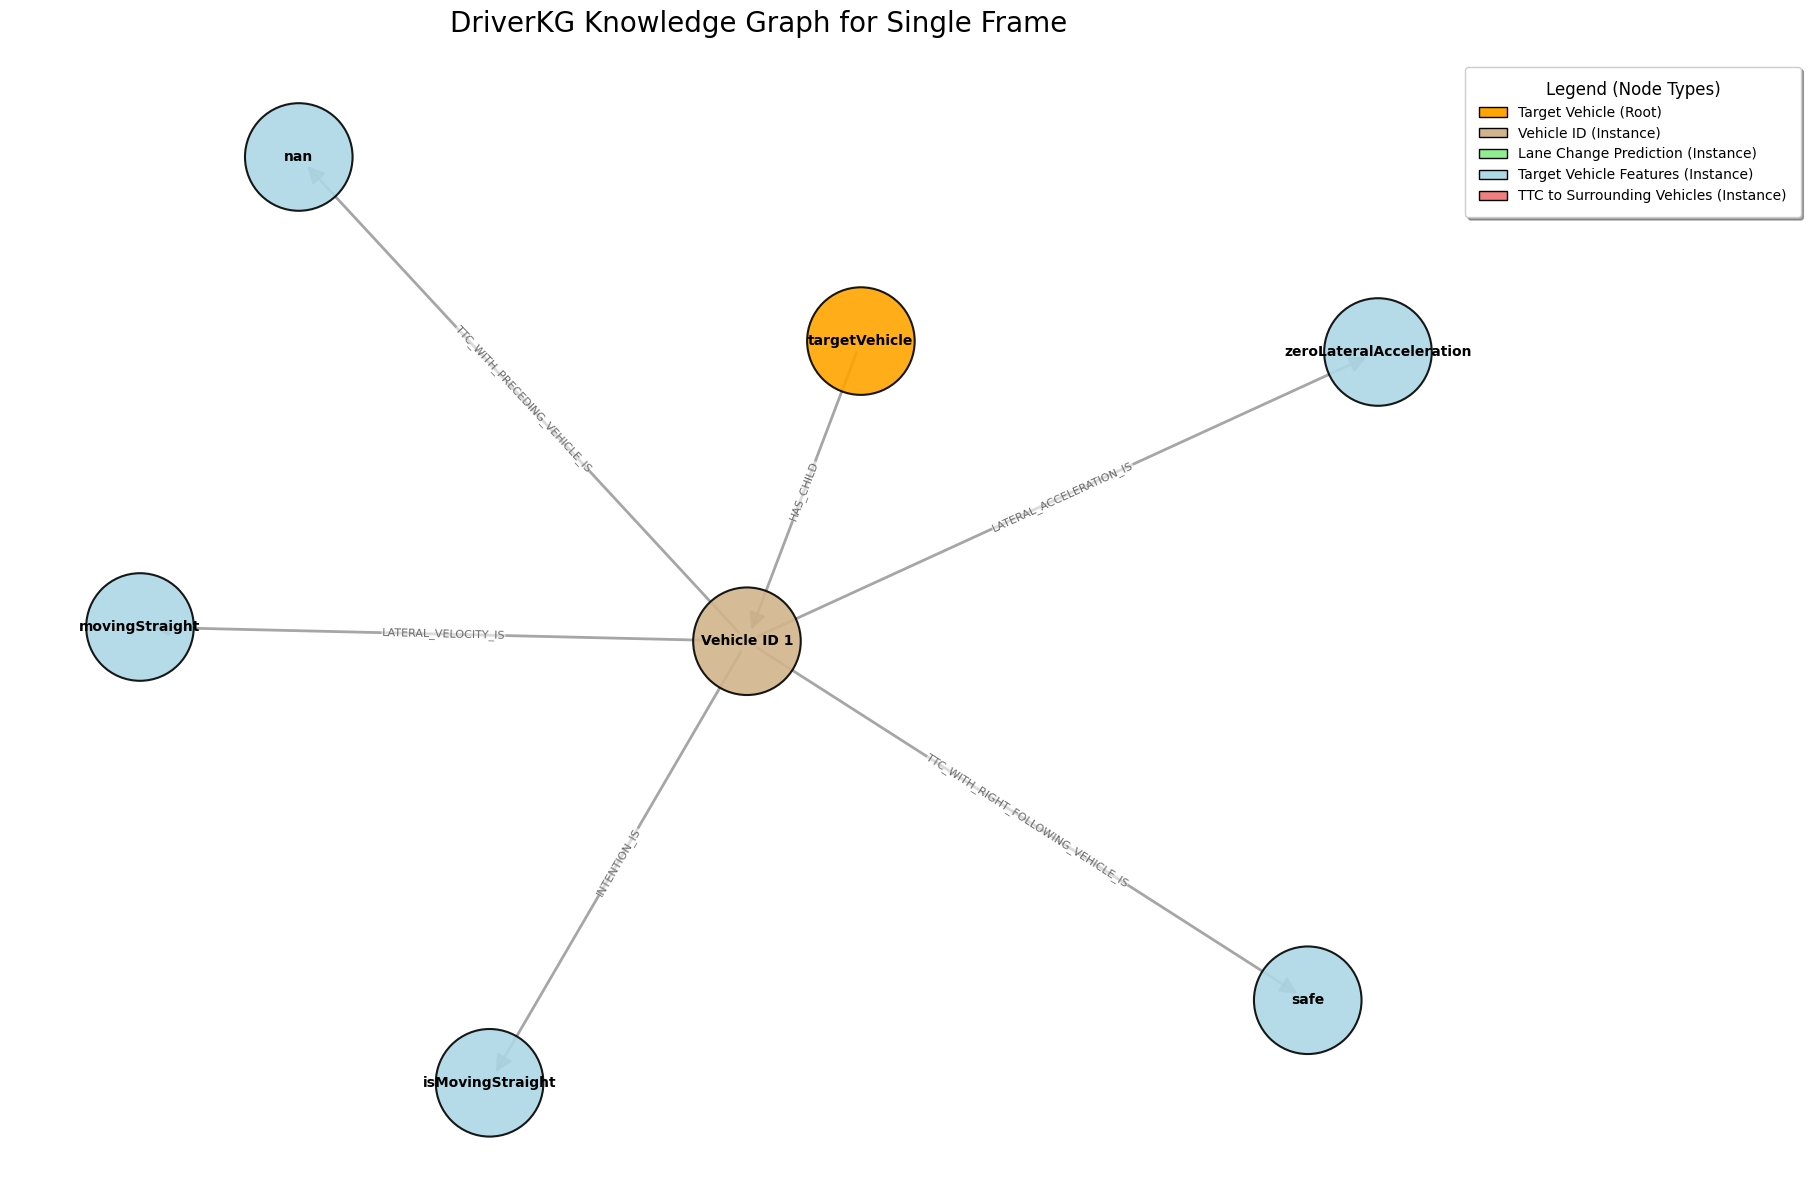

In [17]:
if G.number_of_nodes() > 0:
    plt.figure(figsize=(18, 12)) # Slightly larger figure size for more space
    # Use a layout that spreads nodes out, adjusting k for more distance
    pos = nx.spring_layout(G, k=1.2, iterations=50, seed=42) # Increased k for more space between nodes

    # --- Define node colors based on the legend in Figure (a) ---
    node_colors = []
    for node in G.nodes():
        node_str = str(node)
        if node_str == "targetVehicle":
            node_colors.append(NODE_TYPES['targetVehicle'])
        elif "Vehicle ID" in node_str:
            node_colors.append(NODE_TYPES['Vehicle ID'])
        elif node_str in FEATURE_TO_NODE_TYPE_MAPPING:
            # Use predefined mapping for known linguistic values
            node_colors.append(NODE_TYPES[FEATURE_TO_NODE_TYPE_MAPPING[node_str]])
        elif any(risk in node_str.lower() for risk in ['risk', 'ttc']):
            # General rule for TTC instances (e.g., 'highRisk', 'lowRisk')
            node_colors.append(NODE_TYPES['TTC to Surrounding Vehicles'])
        else:
            # Fallback for other linguistic values (like 'movingStraight', etc.)
            node_colors.append(NODE_TYPES.get('Target Vehicle Features', 'lightgray'))

    # Draw nodes - INCREASED node_size HERE
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=6000, alpha=0.9, linewidths=1.5, edgecolors='black')

    # Draw edges (relations)
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=2.0, alpha=0.7, style='solid', arrowsize=25)

    # Draw node labels - Increased font size slightly as well
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color='black')

    # Draw edge labels (relation names)
    edge_labels = nx.get_edge_attributes(G, 'relation')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='dimgray', font_size=8,
                                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=0.2)) # Slightly larger padding

    # Create a custom legend
    legend_patches = [
        Patch(facecolor=NODE_TYPES['targetVehicle'], edgecolor='black', label='Target Vehicle (Root)'),
        Patch(facecolor=NODE_TYPES['Vehicle ID'], edgecolor='black', label='Vehicle ID (Instance)'),
        Patch(facecolor=NODE_TYPES['Lane Change Prediction'], edgecolor='black', label='Lane Change Prediction (Instance)'),
        Patch(facecolor=NODE_TYPES['Target Vehicle Features'], edgecolor='black', label='Target Vehicle Features (Instance)'),
        Patch(facecolor=NODE_TYPES['TTC to Surrounding Vehicles'], edgecolor='black', label='TTC to Surrounding Vehicles (Instance)')
    ]

    plt.legend(handles=legend_patches, title="Legend (Node Types)", loc='upper right', bbox_to_anchor=(1.2, 1),
               fancybox=True, shadow=True, borderpad=1, title_fontsize='12', fontsize='10')

    plt.title("DriverKG Knowledge Graph for Single Frame", size=20, pad=20)
    plt.axis('off') # Hide axes
    plt.tight_layout() # Adjust layout
    plt.show()
else:
    print("Graph is empty. Cannot visualize.")
    print("Please ensure Cell 4 and 5 ran correctly.")

# Triples Generation

In [18]:
import pandas as pd
from tqdm.notebook import tqdm
import os
import gc # Garbage Collector

# --- 1. Configuration ---
# Define a manageable batch size (e.g., 1 million frames)
BATCH_SIZE = 1_000_000 
# Create a directory to store the output files
output_dir = "triples_parquet_parts"
os.makedirs(output_dir, exist_ok=True)


print(f"Set to process {len(df_linguistic)} frames in batches of {BATCH_SIZE}.")
print(f"Output parts will be saved to: {output_dir}/")

target_vehicle_node = "targetVehicle"

# Calculate the total number of batches needed
num_batches = (len(df_linguistic) // BATCH_SIZE) + 1

# --- 2. Batch Processing Loop ---
for i in tqdm(range(num_batches), desc="Processing Batches"):
    
    # Define the start and end index for this batch
    start_index = i * BATCH_SIZE
    end_index = min((i + 1) * BATCH_SIZE, len(df_linguistic))
    
    # Skip if this batch is empty (can happen at the end)
    if start_index >= end_index:
        continue
        
    # Get the chunk of the DataFrame
    df_chunk = df_linguistic.iloc[start_index:end_index]
    
    batch_triples = [] # This list will *only* hold triples for this one batch
    
    # --- 3. Fast Triple Generation ---
    # Use itertuples() for a massive speed improvement over iterrows()
    for row in df_chunk.itertuples(index=False):
        
        # Get vehicle and frame IDs
        vehicle_id_val = getattr(row, VEHICLE_ID_COLUMN_NAME)
        frame_val = row.frame
        
        # Create the unique vehicle node for this frame
        specific_vehicle_node = f"Vehicle_{vehicle_id_val}_Frame_{frame_val}"

        # Triple 1: <targetVehicle, HAS_CHILD, Vehicle_ID_Frame_ID>
        batch_triples.append([target_vehicle_node, "HAS_CHILD", specific_vehicle_node])

        # Triples 2-N: Features
        for col_name, relation_name in ONTOLOGY_RELATIONS.items():
            instance_value = str(getattr(row, col_name))
            
            # Add the triple: <specific_vehicle_node, relation_name, instance_node>
            batch_triples.append([specific_vehicle_node, relation_name, instance_value])

    # --- 4. Save Batch to Disk ---
    # Convert this *small* batch of triples to a DataFrame
    df_batch_triples = pd.DataFrame(batch_triples, columns=['head', 'relation', 'tail'])
    
    # Define a unique filename for this part
    output_filename = os.path.join(output_dir, f"triples_part_{i:03d}.parquet")
    
    # Save to Parquet format (highly efficient)
    df_batch_triples.to_parquet(output_filename, engine='pyarrow')
    
    # --- 5. Clean Up Memory ---
    # Explicitly delete the objects to free RAM before the next loop
    del df_chunk
    del batch_triples
    del df_batch_triples
    gc.collect() # Ask the garbage collector to clean up

print("\n--- Triples List Generation Complete ---")
print(f"All {num_batches} batches have been saved to the '{output_dir}/' directory.")

Set to process 39725708 frames in batches of 1000000.
Output parts will be saved to: triples_parquet_parts/


Processing Batches:   0%|          | 0/40 [00:00<?, ?it/s]


--- Triples List Generation Complete ---
All 40 batches have been saved to the 'triples_parquet_parts/' directory.


In [19]:
import dask.dataframe as dd

# This single line reads all the parquet files in the folder
# as if they were one giant DataFrame, without loading it
# all into memory at once.
ddf_triples = dd.read_parquet('triples_parquet_parts/')

print(f"Successfully loaded {len(ddf_triples)} triples (in {ddf_triples.npartitions} partitions).")

# You can now use this 'ddf_triples' object with Dask-compatible libraries,
# or compute parts of it as needed.
print("Head of the full dataset:")
print(ddf_triples.head())

Successfully loaded 357531372 triples (in 40 partitions).
Head of the full dataset:
                head                       relation                     tail
0      targetVehicle                      HAS_CHILD        Vehicle_1_Frame_1
1  Vehicle_1_Frame_1                   INTENTION_IS         isMovingStraight
2  Vehicle_1_Frame_1            LATERAL_VELOCITY_IS           movingStraight
3  Vehicle_1_Frame_1        LATERAL_ACCELERATION_IS  zeroLateralAcceleration
4  Vehicle_1_Frame_1  TTC_WITH_PRECEDING_VEHICLE_IS                      nan


In [ ]:
import dask.dataframe as dd
import os
import gc

# Define the new entity string to replace 'nan'
NAN_REPLACEMENT_STRING = "noRisk" # Or "unknownTTC", "notApplicable", etc.

# Load the partitioned dataset you just created
ddf_triples = dd.read_parquet('triples_parquet_parts/')

print(f"Loaded {len(ddf_triples)} triples for cleaning...")

# Fill 'nan' values ONLY in the 'tail' column
# Dask performs this lazily (it doesn't run yet)
print(f"Replacing all 'nan' values in 'tail' with '{NAN_REPLACEMENT_STRING}'...")
ddf_triples['tail'] = ddf_triples['tail'].fillna(NAN_REPLACEMENT_STRING)

# --- Save the Cleaned Data ---
# This is the step that executes the cleaning job
cleaned_output_dir = "triples_cleaned_parquet"
os.makedirs(cleaned_output_dir, exist_ok=True)

print(f"Saving cleaned data to '{cleaned_output_dir}'...")
ddf_triples.to_parquet(cleaned_output_dir)

print("Cleaning complete.")

# Clean up memory
del ddf_triples
gc.collect()

Loaded 357531372 triples for cleaning...
Replacing all 'nan' values in 'tail' with 'noRisk'...
Saving cleaned data to 'triples_cleaned_parquet'...


In [ ]:
# Run this in a new cell
!pip install ampligraph

In [ ]:
import pandas as pd
import glob  # To find your parquet files
import gc    # For garbage collection
from tqdm.notebook import tqdm

# Imports for the MODERN v2 API
from ampligraph.compat import ComplEx
from ampligraph.datasets import DataIndexer, GraphDataLoader
from ampligraph.utils import save_model

In [ ]:
cleaned_parquet_dir = 'triples_cleaned_parquet/'
parquet_files = sorted(glob.glob(f"{cleaned_parquet_dir}/*.parquet"))
if not parquet_files:
    raise FileNotFoundError(f"No parquet files found in {cleaned_parquet_dir}")

print(f"Found {len(parquet_files)} parquet files. Building vocabulary...")

all_entities = set()
all_relations = set()

# Loop through all files to get unique entities and relations
for part_file in tqdm(parquet_files, desc="Building Vocabulary"):
    df_chunk = pd.read_parquet(part_file)
    
    # Add all unique subjects/objects to all_entities
    all_entities.update(df_chunk['head'].unique())
    all_entities.update(df_chunk['tail'].unique())
    
    # Add all unique predicates to all_relations
    all_relations.update(df_chunk['relation'].unique())
    
    del df_chunk
    gc.collect()

print("\nVocabulary build complete.")

# --- Create the Mappings ---
# Convert sets to sorted lists to ensure consistent IDs
entities_list = sorted(list(all_entities))
relations_list = sorted(list(all_relations))

# Create the string-to-integer mapping dictionaries
entity_to_id = {val: i for i, val in enumerate(entities_list)}
relation_to_id = {val: i for i, val in enumerate(relations_list)}

print(f"Total unique entities: {len(entity_to_id)}")
print(f"Total unique relations: {len(relation_to_id)}")

In [ ]:
%%writefile config.py
# This is a Python file, not a notebook cell
import os

# --- FIX: Wrap the entire config in this function ---
def get_torchbiggraph_config():

    # --- 1. Define Data & Model Paths ---
    data_dir = "ptbg_raw_tsv"

    # Look for .tsv.gz files
    edge_paths = [
        os.path.join(data_dir, f) for f in os.listdir(data_dir) 
        if f.endswith(".tsv.gz")
    ]

    # These directories will be CREATED by PytBG
    entity_path = "ptbg_entities"
    checkpoint_path = "ptbg_model_checkpoint"

    # --- 2. Define Model Parameters ---
    config = {
        # I. Data
        'entity_path': entity_path,
        'edge_paths': edge_paths,
        'checkpoint_path': checkpoint_path,
        
        # II. Model
        'relations': [
            {
                'name': 'all',
                'operator': 'complex_diagonal', # ComplEx model
                'weight': 1.0,
            }
        ],

        # III. Key Hyperparameters
        'dimension': 150,
        'num_epochs': 10,
        
        # IV. Training
        'batch_size': 10000,
        'num_batch_negs': 1000,
        'lr': 0.1,
        'regularization_coef': 1e-3,

        # V. Hardware/Speed
        'num_workers': 8,
        'eval_fraction': 0.0,
    }

    # --- FIX: Return the config dictionary ---
    return config

In [ ]:
!torchbiggraph_train config.py

In [ ]:
# --- 1. Define Training Parameters ---
TOTAL_TRIPLES = 357531372 
TRAIN_BATCH_SIZE = 100000
STEPS_PER_EPOCH = TOTAL_TRIPLES // TRAIN_BATCH_SIZE

# --- 2. Define the KGE Model (FIX: Renamed 'embedding_dim' to 'k') ---
# The modern API infers entity/relation counts, but the embedding
# dimension is specified with 'k'.
model = ComplEx(
    k=150,      # <-- This is the correct parameter name
    verbose=True
)

# --- 3. Compile the Model ---
model.compile(
    loss='nll',
    optimizer='adam'
)

# --- 4. Create the Generator Instance ---
train_gen = data_generator(
    parquet_files,
    entity_to_id,
    relation_to_id,
    batch_size=TRAIN_BATCH_SIZE
)

# --- 5. Train the Model ---
print("Starting KGE model training with custom generator...")
model.fit(
    train_gen,
    max_epochs=10,
    steps_per_epoch=STEPS_PER_EPOCH,
    negative_sampler='uniform',
    negative_sampler_args={
        'num_neg_per_positive': 20
    }
)

print("Training complete!")

# --- 6. Save the Trained Model ---
model_file_name = "DriverKG_ComplEx_model.pkl"
save_model(model, model_file_name)

print(f"Model saved to '{model_file_name}'")

In [ ]:
import pandas as pd
import glob
import os
import gc
from tqdm import tqdm

# --- LOAD YOUR MAPS FIRST ---
# (Assuming entity_to_id and relation_to_id are in memory from your previous script)
# If not, you'll need to save them as .json or .pkl and load them back here.
# For example, after your script:
# import pickle
# with open('entity_to_id.pkl', 'wb') as f:
#     pickle.dump(entity_to_id, f)
# with open('relation_to_id.pkl', 'wb') as f:
#     pickle.dump(relation_to_id, f)
#
# And then load them here:
# with open('entity_to_id.pkl', 'rb') as f:
#     entity_to_id = pickle.load(f)
# with open('relation_to_id.pkl', 'rb') as f:
#     relation_to_id = pickle.load(f)
# -----------------------------

print(f"Loaded {len(entity_to_id)} entity mappings.")
print(f"Loaded {len(relation_to_id)} relation mappings.")

# --- Define Directories ---
cleaned_parquet_dir = 'triples_cleaned_parquet/'
numeric_parquet_dir = 'triples_numeric_parquet/'

# Create the output directory if it doesn't exist
os.makedirs(numeric_parquet_dir, exist_ok=True)

parquet_files = sorted(glob.glob(f"{cleaned_parquet_dir}/*.parquet"))

if not parquet_files:
    raise FileNotFoundError(f"No parquet files found in {cleaned_parquet_dir}")

print(f"Found {len(parquet_files)} files. Starting numeric conversion...")

# --- Loop, Map, and Save ---
for part_file in tqdm(parquet_files, desc="Converting Triples to IDs"):
    df_chunk = pd.read_parquet(part_file)
    
    # Apply the mappings. This is the most important step.
    df_chunk['head_id'] = df_chunk['head'].map(entity_to_id)
    df_chunk['tail_id'] = df_chunk['tail'].map(relation_to_id)
    df_chunk['relation_id'] = df_chunk['relation'].map(relation_to_id)
    
    # Drop the original string columns to save space
    df_chunk = df_chunk.drop(columns=['head', 'tail', 'relation'])
    
    # Select and reorder columns
    df_chunk_numeric = df_chunk[['head_id', 'relation_id', 'tail_id']]
    
    # Define the output file path
    basename = os.path.basename(part_file)
    output_path = os.path.join(numeric_parquet_dir, basename)
    
    # Save the numeric-only dataframe
    df_chunk_numeric.to_parquet(output_path, index=False)
    
    del df_chunk, df_chunk_numeric
    gc.collect()

print("\nNumeric conversion complete.")
print(f"All numeric files saved to {numeric_parquet_dir}")

In [ ]:
# Run this in a new cell
!pip install torchbiggraph

In [ ]:
# This command will delete the folder and all 32 files you just created
!rm -rf ptbg_raw_tsv
print("Cleaned up old 'ptbg_raw_tsv' directory.")

In [ ]:
import pandas as pd
import glob
import os
import gc
from tqdm.notebook import tqdm

# --- 1. Configuration ---
cleaned_parquet_dir = "triples_cleaned_parquet/"
raw_tsv_output_dir = "ptbg_raw_tsv/"
os.makedirs(raw_tsv_output_dir, exist_ok=True)

print(f"Loading cleaned Parquet files from: {cleaned_parquet_dir}")
print(f"Saving *GZIPPED* raw TSV files to: {raw_tsv_output_dir}")

parquet_files = sorted(glob.glob(os.path.join(cleaned_parquet_dir, "*.parquet")))
print(f"Found {len(parquet_files)} Parquet partitions to convert.")

# --- 2. Conversion Loop ---
for i, part_file in enumerate(tqdm(parquet_files, desc="Converting Parquet to TSV.GZ")):
    
    df_part = pd.read_parquet(part_file)
    
    # --- FIX 1: Change filename to .tsv.gz ---
    output_filename = os.path.join(raw_tsv_output_dir, f"triples_part_{i:03d}.tsv.gz")
    
    # --- FIX 2: Add compression='gzip' ---
    df_part.to_csv(
        output_filename,
        sep='\t',
        header=False,
        index=False,
        compression='gzip'  # This will compress the output file
    )
    
    del df_part
    gc.collect()

print("\n--- Gzipped TSV Conversion Complete ---")
print(f"All {len(parquet_files)} partitions have been saved to '{raw_tsv_output_dir}'")

In [ ]:
%%writefile config.py
# This is a Python file, not a notebook cell
import os

# --- 1. Define Data & Model Paths ---
data_dir = "ptbg_raw_tsv"

# --- FIX: Look for .tsv.gz files ---
edge_paths = [
    os.path.join(data_dir, f) for f in os.listdir(data_dir) 
    if f.endswith(".tsv.gz")
]

# These directories will be CREATED by PytBG
entity_path = "ptbg_entities"
checkpoint_path = "ptbg_model_checkpoint"

# --- 2. Define Model Parameters ---
config = {
    # I. Data
    'entity_path': entity_path,
    'edge_paths': edge_paths,
    'checkpoint_path': checkpoint_path,
    
    # II. Model
    'relations': [
        {
            'name': 'all',
            'operator': 'complex_diagonal', # ComplEx model
            'weight': 1.0,
        }
    ],

    # III. Key Hyperparameters
    'dimension': 150,
    'num_epochs': 10,
    
    # IV. Training
    'batch_size': 10000,
    'num_batch_negs': 1000,
    'lr': 0.1,
    'regularization_coef': 1e-3,

    # V. Hardware/Speed
    'num_workers': 8,
    'eval_fraction': 0.0,
}

In [ ]:
!torchbiggraph_train config.py

In [ ]:
%%writefile config.py
# This is a Python file, not a notebook cell
import os

# --- FIX: Wrap the entire config in this function ---
def get_torchbiggraph_config():

    # --- 1. Define Data & Model Paths ---
    data_dir = "ptbg_raw_tsv"

    # Look for .tsv.gz files
    edge_paths = [
        os.path.join(data_dir, f) for f in os.listdir(data_dir) 
        if f.endswith(".tsv.gz")
    ]

    # These directories will be CREATED by PytBG
    entity_path = "ptbg_entities"
    checkpoint_path = "ptbg_model_checkpoint"

    # --- 2. Define Model Parameters ---
    config = {
        # I. Data
        'entity_path': entity_path,
        'edge_paths': edge_paths,
        'checkpoint_path': checkpoint_path,
        
        # II. Model
        'relations': [
            {
                'name': 'all',
                'operator': 'complex_diagonal', # ComplEx model
                'weight': 1.0,
            }
        ],

        # III. Key Hyperparameters
        'dimension': 150,
        'num_epochs': 10,
        
        # IV. Training
        'batch_size': 10000,
        'num_batch_negs': 1000,
        'lr': 0.1,
        'regularization_coef': 1e-3,

        # V. Hardware/Speed
        'num_workers': 8,
        'eval_fraction': 0.0,
    }

    # --- FIX: Return the config dictionary ---
    return config